In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

### Definition of the model

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma,gamma2):
    S,I,R,M = y
    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I - gamma2*I
    dRdt = gamma*I 
    dMdt = gamma2*I 
    return dSdt, dIdt, dRdt, dMdt

### Integration of the differential equations

In [3]:
def time_evo(N,beta,gamma,gamma2,I0=1,R0=0,M0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0-M0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0, M0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma,gamma2))
    S, I, R, M = np.transpose(ret)
    
    return (t,S,I,R,M)

### Show the result

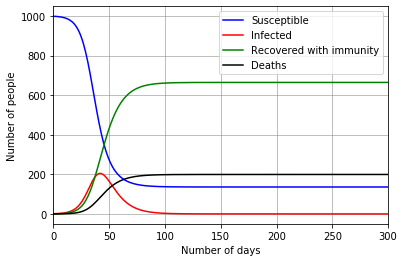

In [4]:
fin_result=time_evo(1000,0.3,0.1,0.03)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered with immunity')
plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend()
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,300)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

#print(s_vec+i_vec+r_vec+m_vec)

### Load italian data

In [5]:
dataITA=pd.read_csv('dataITA.txt')

xdata=dataITA['Time']
ydata=dataITA['Infected']
ydata_death=dataITA['Deaths']
ydata_rec=dataITA['Recovered']

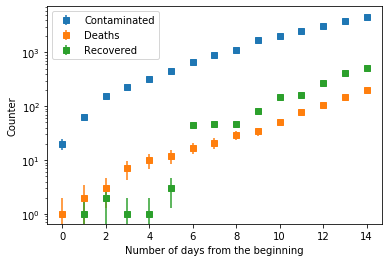

In [37]:
plt.errorbar(xdata,ydata,np.sqrt(ydata),linestyle='None',label='Contaminated',marker='s')
plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='None',label='Deaths',marker='s')
plt.errorbar(xdata,ydata_rec,np.sqrt(ydata_rec),linestyle='None',label='Recovered',marker='s')
plt.yscale('log')
plt.xlabel('Number of days from the beginning')
plt.ylabel('Counter')
plt.legend()
plt.show()

### comparison between model and data

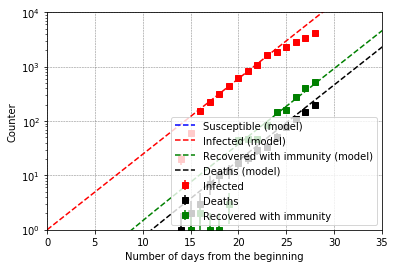

In [38]:
fin_result=time_evo(60*10**6,0.35,1/50,1/100,I0=1,t=np.arange(0,720))

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

plt.errorbar(xdata+14,ydata-ydata_rec,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',label='Infected',marker='s')
plt.errorbar(xdata+14,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',label='Deaths',marker='s')
plt.errorbar(xdata+14,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',label='Recovered with immunity',marker='s')
plt.plot(t, s_vec, 'b--', label='Susceptible (model)')
plt.plot(t, i_vec, 'r--', label='Infected (model)')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity (model)')
plt.plot(t, m_vec, 'k--', label='Deaths (model)')
plt.yscale('log')
plt.xlim(0,35)
plt.ylim(1,10**4)
plt.xlabel('Number of days from the beginning')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('sirdatacomp.png',dpi=300)
plt.show()

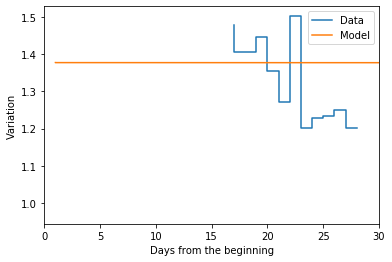

In [78]:
# percentage variation of the contaminted people, compared to the previous day


# data increment
incremento=[]

for i in range(3,len(ydata)):
    incremento.append(ydata[i]/ydata[i-1])
 

# sir increment
incr_SIR=[]

for i in range(len(i_vec)-1):
    incr_SIR.append(i_vec[i+1]/i_vec[i])

plt.step(xdata[xdata>=3]+14,incremento,label='Data')
plt.step(t[1:],incr_SIR,label='Model')
plt.xlabel('Days from the beginning')
plt.ylabel('Variation')
plt.xlim(0,30)
plt.legend()
plt.savefig('first_derivative_SIR.png',dpi=300)
plt.show()

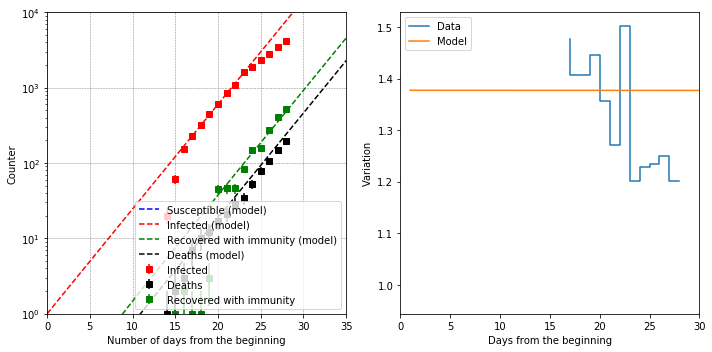

In [79]:
### combined plot

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.errorbar(xdata+14,ydata-ydata_rec,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',label='Infected',marker='s')
plt.errorbar(xdata+14,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',label='Deaths',marker='s')
plt.errorbar(xdata+14,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',label='Recovered with immunity',marker='s')
plt.plot(t, s_vec, 'b--', label='Susceptible (model)')
plt.plot(t, i_vec, 'r--', label='Infected (model)')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity (model)')
plt.plot(t, m_vec, 'k--', label='Deaths (model)')
plt.yscale('log')
plt.xlim(0,35)
plt.ylim(1,10**4)
plt.xlabel('Number of days from the beginning')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.subplot(1,2,2)
plt.step(xdata[xdata>=3]+14,incremento,label='Data')
plt.step(t[1:],incr_SIR,label='Model')
plt.xlabel('Days from the beginning')
plt.ylabel('Variation')
plt.xlim(0,30)
plt.legend()
plt.tight_layout()
plt.savefig('combined_SIR.png',dpi=300)
plt.show()